# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [103]:
data_file = "pizza_delivery_locations.csv"

In [104]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [105]:
import random
from math import sqrt

def euclidean(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))
    for i in range(dimensions):
        res+=pow(abs(v1[i]-v2[i]),2)

    return sqrt(float(res))

# k-means clustering
def kcluster(rows,distance=euclidean,k=4):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows]))
    for i in range(len(rows[0]))]

    # Create k randomly placed centroids
    clusters=[[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0]
                            for i in range(len(rows[0]))] for j in range(k)]
  
    lastmatches=None
    bestmatches=None

    for t in range(100):
        bestmatches=[[] for i in range(k)]
    
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row=rows[j]
            bestmatch=0
            for i in range(k):
                d=distance(clusters[i],row)
                if d<distance(clusters[bestmatch],row): bestmatch=i
            bestmatches[bestmatch].append(j)

        # If the results are the same as last time, this is complete
        if bestmatches==lastmatches: break
        lastmatches=bestmatches
    
        # Move the centroids to the average of the cluster members
        for i in range(k):
            avgs=[0.0]*len(rows[0])
            if len(bestmatches[i])>0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m]+=rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j]/=len(bestmatches[i])
                clusters[i]=avgs
      
    return [clusters, bestmatches]

In [106]:
# clustering code for 2,3 and 4 clusters
K = 2

two_cluster_centroids = kcluster(data, euclidean, 2)
three_cluster_centroids = kcluster(data, euclidean, 3)
four_cluster_centroids = kcluster(data, euclidean, 4)

In [107]:
# Extracting best store locations for each cluster of addresses
print(two_cluster_centroids[0])

print(three_cluster_centroids[0])

print(four_cluster_centroids[0])

[[43.63727286046531, -116.22524744798069], [43.66816551446282, -116.26604820247981]]
[[43.673370234806846, -116.268173160221], [43.63263042079218, -116.2097921683169], [43.64430153457963, -116.24478462616814]]
[[43.63727286046531, -116.22524744798069], [43.663956051111185, -116.2668794800005], [43.63966150641114, -116.27812656148099], [43.72387899999997, -116.25504600000009]]


## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

1301
10


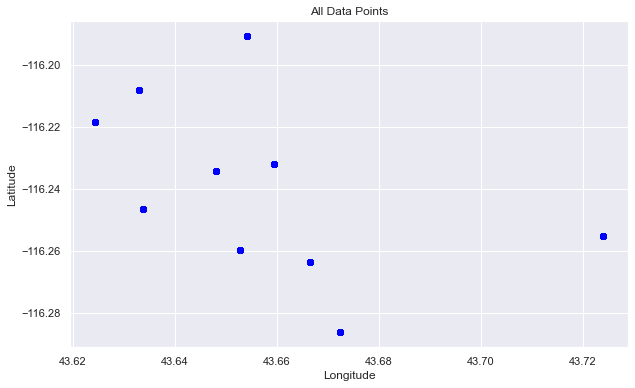

In [108]:
print(len(data))

coordinates_list = [tuple(row) for row in data]

print(len(set(coordinates_list)))

long = []
lat = []
for point in coordinates_list:
    long.append(point[0])
    lat.append(point[1])
    
    
plt.figure(figsize=(10, 6))
plt.scatter(long, lat, color='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All Data Points')
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


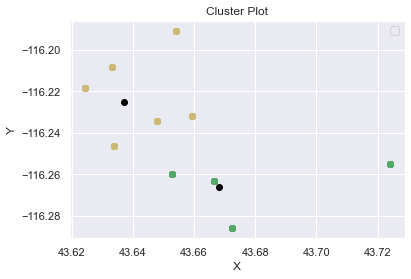

In [109]:
colors = ['y', 'g', 'b', 'p']
K = 2
for cluster in range(0, K):
    for j in two_cluster_centroids[1][cluster]:
        plt.scatter(data[j][0], data[j][1], color=colors[cluster], marker = 'o')

for centroid in two_cluster_centroids[0]:
    plt.scatter(centroid[0], centroid[1], color='black', marker = 'o')
        
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Plot')
plt.legend()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


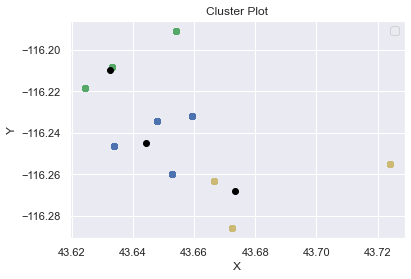

In [110]:
K = 3
colors = ['y', 'g', 'b', 'p']
for cluster in range(0, K):
    for j in three_cluster_centroids[1][cluster]:
        plt.scatter(data[j][0], data[j][1], color=colors[cluster], marker = 'o')

for centroid in three_cluster_centroids[0]:
    plt.scatter(centroid[0], centroid[1], color='black', marker = 'o')
        
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Plot')
plt.legend()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


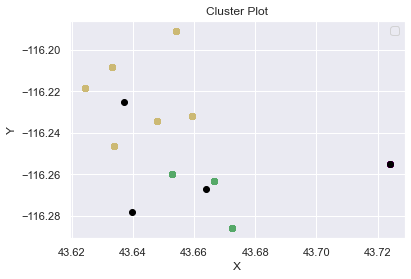

In [111]:
K = 4
colors = ['y', 'g', 'b', 'purple']
for cluster in range(0, K):
    for j in four_cluster_centroids[1][cluster]:
        plt.scatter(data[j][0], data[j][1], color=colors[cluster], marker = 'o')

for centroid in four_cluster_centroids[0]:
    plt.scatter(centroid[0], centroid[1], color='black', marker = 'o')
        
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Plot')
plt.legend()
plt.grid(True)
plt.show()

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.